In [2]:
import pandas as pd
import numpy as np

In [2]:
vg_sales= pd.read_csv('VG_Retail_Sales_DB.csv', encoding='latin1')
vg_scores= pd.read_csv('all_games.csv')

vg = pd.merge(vg_sales, vg_scores, left_on='Name', right_on='name', how='inner')
vg = vg.drop(['index', 'name', 'platform'], axis=1)
vg['user_review'] = pd.to_numeric(vg['user_review'], errors='coerce')

vg

Name Platform    Year         Genre  \
0           Medal of Honor: Rising Sun      PS2  2003.0       Shooter   
1           Medal of Honor: Rising Sun       XB  2003.0       Shooter   
2                            Fable III     X360  2010.0  Role-Playing   
3                            Fable III     X360  2010.0  Role-Playing   
4       Call of Duty: Advanced Warfare     XOne  2014.0       Shooter   
...                                ...      ...     ...           ...   
3372       Legacy of Kain: Soul Reaver       PS     NaN        Action   
3373            ATV: Quad Power Racing       PS  2000.0        Racing   
3374            ATV: Quad Power Racing       PS  2000.0        Racing   
3375          Naruto: Clash of Ninja 2       GC  2003.0      Fighting   
3376  Dance Dance Revolution SuperNOVA      PS2  2006.0    Simulation   

                         Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
0                  Electronic Arts      1.98      2.23      0.13         0.80   
1                  Electronic Arts      0.76      0.36      0.00         0.05   
2           Microsoft Game Studios      3.59      1.11      0.05         0.38   
3           Microsoft Game Studios      3.59      1.11      0.05         0.38   
4                       Activision      3.21      1.53      0.01         0.38   
...                            ...       ...       ...       ...          ...   
3372             Eidos Interactive      0.58      0.40      0.00         0.07   
3373         Acclaim Entertainment      0.58      0.39      0.00         0.07   
3374         Acclaim Entertainment      0.58      0.39      0.00         0.07   
3375                      Nintendo      0.44      0.12      0.45         0.03   
3376  Konami Digital Entertainment      0.87      0.03      0.00         0.14   

      Global_Sales release_date  \
0             5.13    11-Nov-03   
1             1.17    11-Nov-03   
2             5.13    26-Oct-10   
3             5.13    17-May-11   
4             5.13     3-Nov-14   
...            ...          ...   
3372          1.04    16-Aug-99   
3373          1.04    20-Aug-02   
3374          1.04    23-Aug-00   
3375          1.04    26-Sep-06   
3376          1.04    26-Sep-06   

                                                summary  meta_score  \
0     The epic saga of World War II continues with M...          68   
1     The epic saga of World War II continues with M...          68   
2     Five decades have passed since the events of F...          80   
3     Fans new and returning will now embark on an e...          75   
4     Call of Duty: Advanced Warfare predicts the po...          83   
...                                                 ...         ...   
3372  Cast down to the material world, the mysteriou...          91   
3373  Features 10 unique and challenging tracks and ...          49   
3374  Hit the dirt with the only quad racing game av...          42   
3375  The hit series on Cartoon Network is back for ...          74   
3376  (Also known as "Dancing Stage SuperNOVA" in th...          73   

      user_review  
0             6.6  
1             6.6  
2             6.6  
3             5.6  
4             5.8  
...           ...  
3372          9.0  
3373          8.5  
3374          NaN  
3375          8.7  
3376          7.8  

[3377 rows x 14 columns]

In [31]:
platform= vg['Platform'].value_counts()

platform

PS2     732
PS3     618
X360    616
Wii     259
DS      144
PS4     142
XB      127
PS      119
PSP     109
GBA      92
PC       90
XOne     89
GC       61
3DS      39
N64      39
WiiU     22
SNES     19
GB       12
GEN      11
2600     11
NES       9
PSV       7
DC        7
SCD       2
SAT       1
Name: Platform, dtype: int64

In [3]:
conditions = [
    vg['Platform'].isin(['PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV']),
    vg['Platform'].isin(['XB', 'X360', 'XOne']),
    vg['Platform'].isin(['Wii', 'DS', 'GBA', 'GC', '3DS', 'N64', 'WiiU', 'SNES', 'GB', 'GEN', 'NES', 'SCD']),
    vg['Platform'].isin(['DC', 'SAT']),
    vg['Platform'].isin(['2600']),
    vg['Platform'].isin(['PC'])]

choices = ['Sony', 'Microsoft', 'Nintendo', 'Sega', 'Atari', 'Other']

vg['Console_Company'] = np.select(conditions, choices)

vg

Name Platform    Year         Genre  \
0           Medal of Honor: Rising Sun      PS2  2003.0       Shooter   
1           Medal of Honor: Rising Sun       XB  2003.0       Shooter   
2                            Fable III     X360  2010.0  Role-Playing   
3                            Fable III     X360  2010.0  Role-Playing   
4       Call of Duty: Advanced Warfare     XOne  2014.0       Shooter   
...                                ...      ...     ...           ...   
3372       Legacy of Kain: Soul Reaver       PS     NaN        Action   
3373            ATV: Quad Power Racing       PS  2000.0        Racing   
3374            ATV: Quad Power Racing       PS  2000.0        Racing   
3375          Naruto: Clash of Ninja 2       GC  2003.0      Fighting   
3376  Dance Dance Revolution SuperNOVA      PS2  2006.0    Simulation   

                         Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
0                  Electronic Arts      1.98      2.23      0.13         0.80   
1                  Electronic Arts      0.76      0.36      0.00         0.05   
2           Microsoft Game Studios      3.59      1.11      0.05         0.38   
3           Microsoft Game Studios      3.59      1.11      0.05         0.38   
4                       Activision      3.21      1.53      0.01         0.38   
...                            ...       ...       ...       ...          ...   
3372             Eidos Interactive      0.58      0.40      0.00         0.07   
3373         Acclaim Entertainment      0.58      0.39      0.00         0.07   
3374         Acclaim Entertainment      0.58      0.39      0.00         0.07   
3375                      Nintendo      0.44      0.12      0.45         0.03   
3376  Konami Digital Entertainment      0.87      0.03      0.00         0.14   

      Global_Sales release_date  \
0             5.13    11-Nov-03   
1             1.17    11-Nov-03   
2             5.13    26-Oct-10   
3             5.13    17-May-11   
4             5.13     3-Nov-14   
...            ...          ...   
3372          1.04    16-Aug-99   
3373          1.04    20-Aug-02   
3374          1.04    23-Aug-00   
3375          1.04    26-Sep-06   
3376          1.04    26-Sep-06   

                                                summary  meta_score  \
0     The epic saga of World War II continues with M...          68   
1     The epic saga of World War II continues with M...          68   
2     Five decades have passed since the events of F...          80   
3     Fans new and returning will now embark on an e...          75   
4     Call of Duty: Advanced Warfare predicts the po...          83   
...                                                 ...         ...   
3372  Cast down to the material world, the mysteriou...          91   
3373  Features 10 unique and challenging tracks and ...          49   
3374  Hit the dirt with the only quad racing game av...          42   
3375  The hit series on Cartoon Network is back for ...          74   
3376  (Also known as "Dancing Stage SuperNOVA" in th...          73   

      user_review Console_Company  
0             6.6            Sony  
1             6.6       Microsoft  
2             6.6       Microsoft  
3             5.6       Microsoft  
4             5.8       Microsoft  
...           ...             ...  
3372          9.0            Sony  
3373          8.5            Sony  
3374          NaN            Sony  
3375          8.7        Nintendo  
3376          7.8            Sony  

[3377 rows x 15 columns]

In [4]:
vg['Publisher'].value_counts()

Electronic Arts         880
Activision              416
Ubisoft                 214
Nintendo                213
Take-Two Interactive    209
                       ... 
Parker Bros.              1
Ocean                     1
Russel                    1
Hudson Soft               1
Play It                   1
Name: Publisher, Length: 63, dtype: int64

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

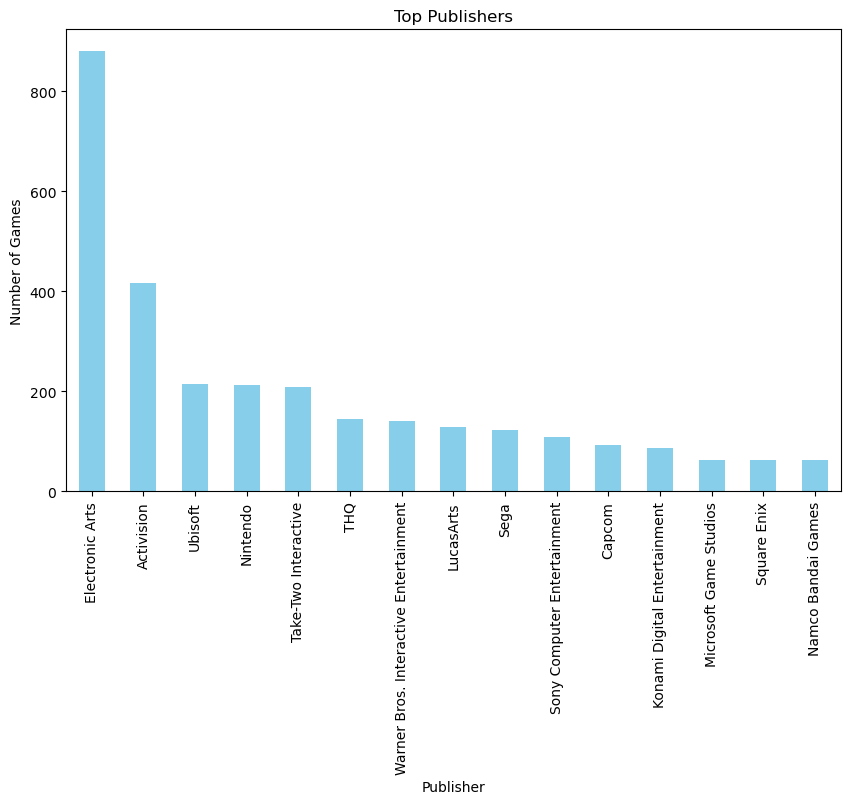

In [6]:
top_publishers = vg['Publisher'].value_counts().head(15)

plt.figure(figsize=(10, 6))
top_publishers.plot(kind='bar', color='skyblue')
plt.title('Top Publishers')
plt.xlabel('Publisher')
plt.ylabel('Number of Games')
plt.show()

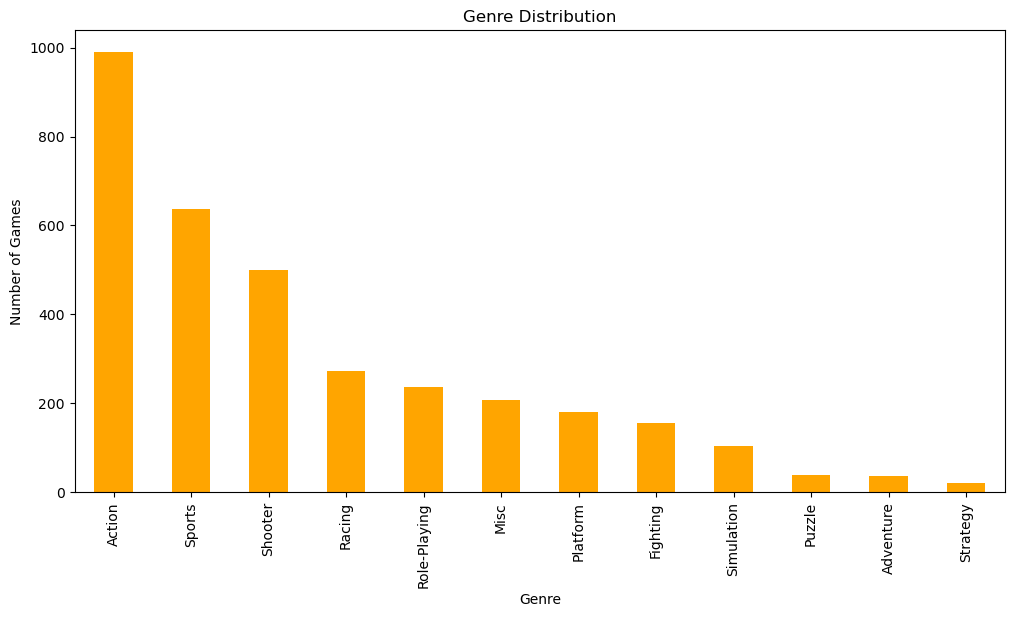

In [7]:
genre_distribution = vg['Genre'].value_counts()

plt.figure(figsize=(12, 6))
genre_distribution.plot(kind='bar', color='orange')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Number of Games')
plt.show()

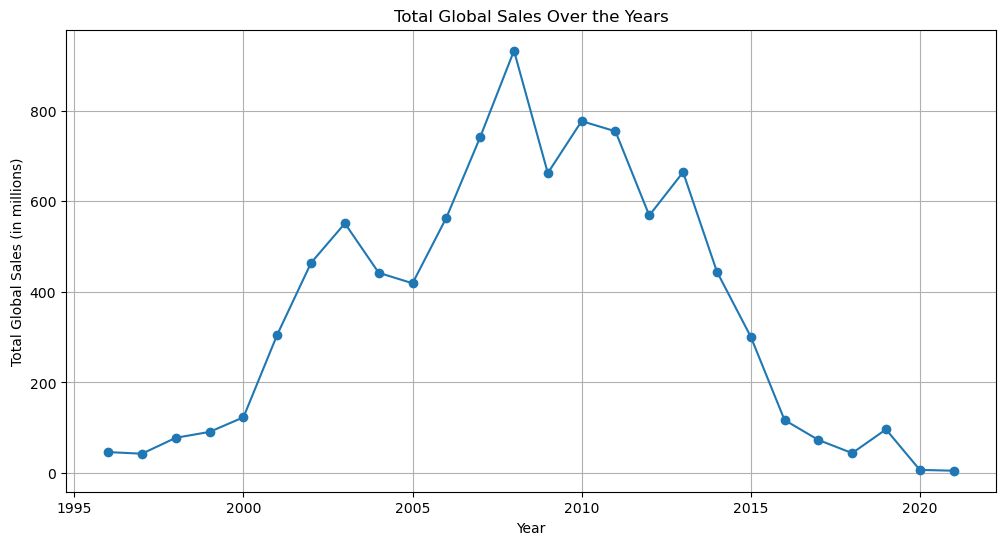

In [8]:
vg['release_date'] = pd.to_datetime(vg['release_date'], errors='coerce')

total_global_sales_by_year = vg.groupby(vg['release_date'].dt.year)['Global_Sales'].sum()

plt.figure(figsize=(12, 6))
plt.plot(total_global_sales_by_year.index, total_global_sales_by_year.values, marker='o', color='#1f77b4')
plt.title('Total Global Sales Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Global Sales (in millions)')
plt.grid(True)
plt.show()

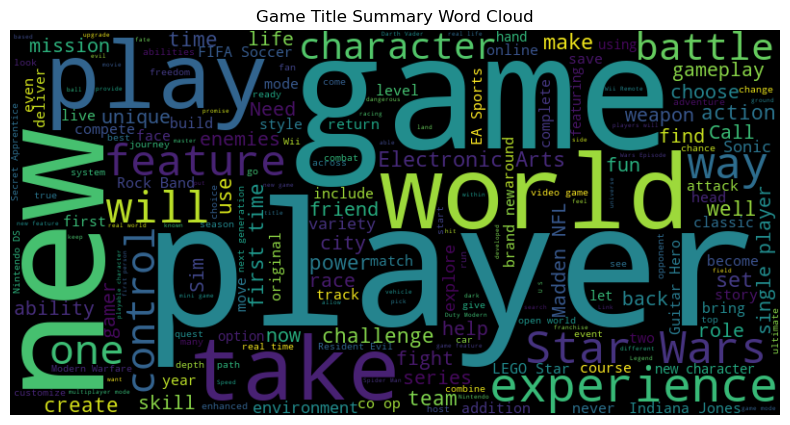

In [9]:
all_summaries = ' '.join(vg['summary'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='black').generate(all_summaries)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Game Title Summary Word Cloud')
plt.savefig('wordcloud.png')
plt.show()

<Figure size 1200x800 with 0 Axes>

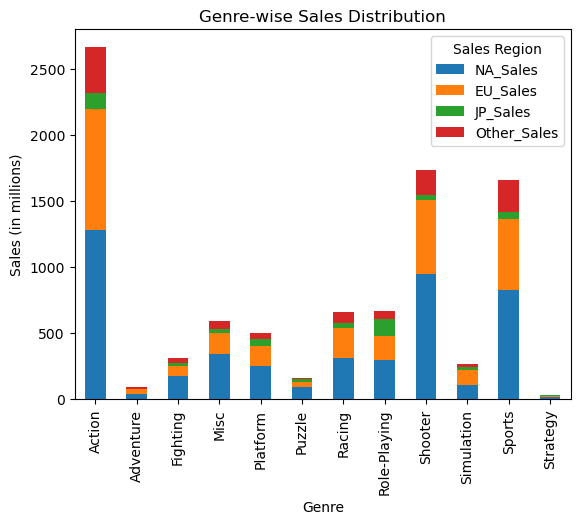

In [10]:
genre_sales = vg.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

plt.figure(figsize=(12, 8))
genre_sales.plot(kind='bar', stacked=True)
plt.title('Genre-wise Sales Distribution')
plt.xlabel('Genre')
plt.ylabel('Sales (in millions)')
plt.legend(title='Sales Region', bbox_to_anchor=(1, 1))
plt.show()

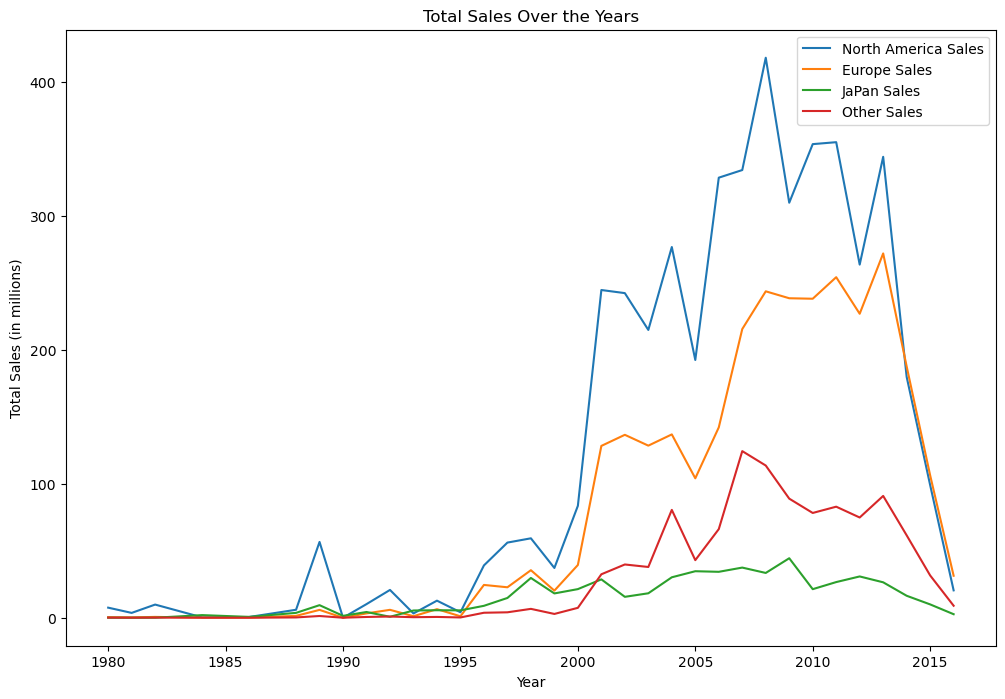

In [11]:
sales_over_years = vg.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()


plt.figure(figsize=(12, 8))
plt.plot(sales_over_years.index, sales_over_years['NA_Sales'], label='North America Sales')
plt.plot(sales_over_years.index, sales_over_years['EU_Sales'], label='Europe Sales')
plt.plot(sales_over_years.index, sales_over_years['JP_Sales'], label='JaPan Sales')
plt.plot(sales_over_years.index, sales_over_years['Other_Sales'], label='Other Sales')

plt.title('Total Sales Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Sales (in millions)')
plt.legend()
plt.show()

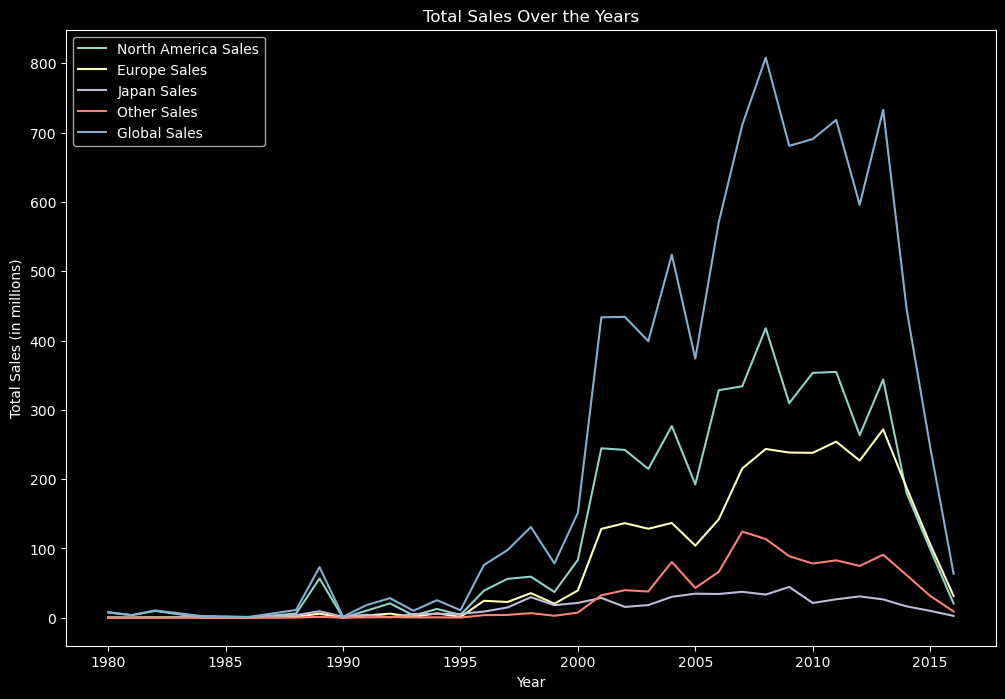

In [12]:
sales_over_years = vg.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum()

plt.style.use('dark_background')

plt.figure(figsize=(12, 8))
plt.plot(sales_over_years.index, sales_over_years['NA_Sales'], label='North America Sales')
plt.plot(sales_over_years.index, sales_over_years['EU_Sales'], label='Europe Sales')
plt.plot(sales_over_years.index, sales_over_years['JP_Sales'], label='Japan Sales')
plt.plot(sales_over_years.index, sales_over_years['Other_Sales'], label='Other Sales')
plt.plot(sales_over_years.index, sales_over_years['Global_Sales'], label='Global Sales')

plt.title('Total Sales Over the Years', color='white')
plt.xlabel('Year', color='white')
plt.ylabel('Total Sales (in millions)', color='white')
plt.legend()

plt.show()

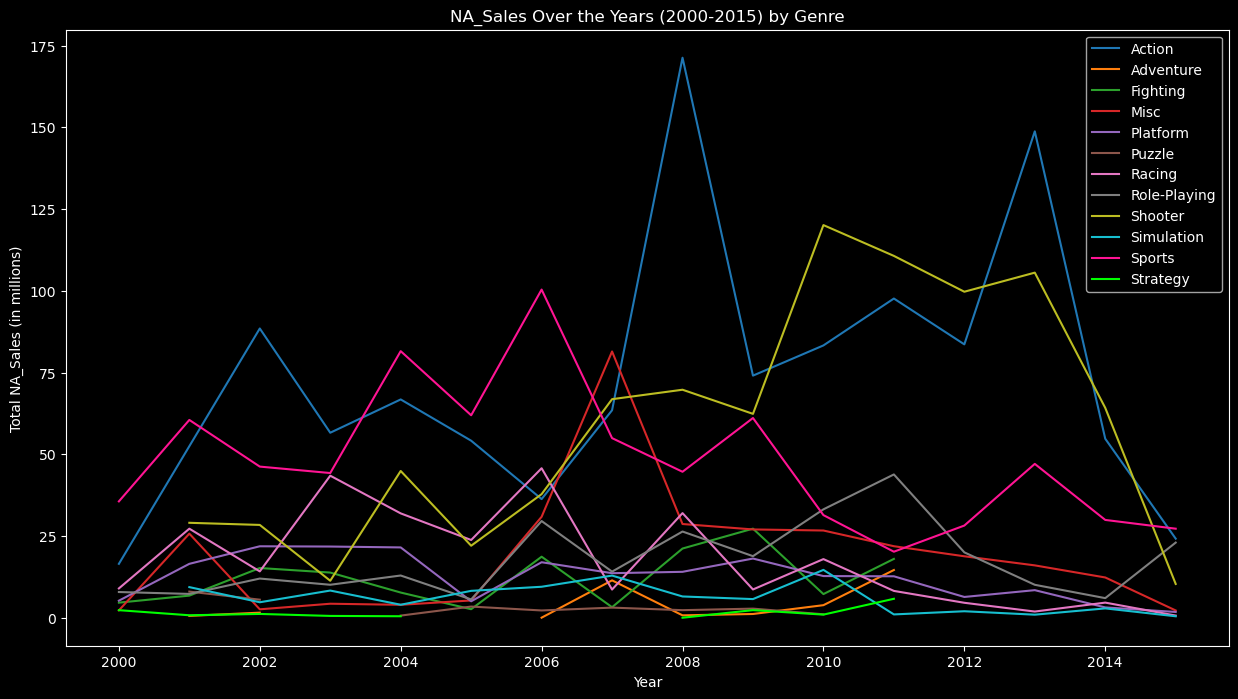

In [13]:
vg_filtered_years = vg[(vg['Year'] >= 2000) & (vg['Year'] <= 2015)]

na_sales_by_genre = vg_filtered_years.groupby(['Year', 'Genre'])['NA_Sales'].sum().unstack()

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#FF1493', '#00FF00']

plt.figure(figsize=(15, 8))
for i, genre in enumerate(na_sales_by_genre.columns):
    plt.plot(na_sales_by_genre.index, na_sales_by_genre[genre], label=genre, color=colors[i])

plt.title('NA_Sales Over the Years (2000-2015) by Genre')
plt.xlabel('Year')
plt.ylabel('Total NA_Sales (in millions)')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

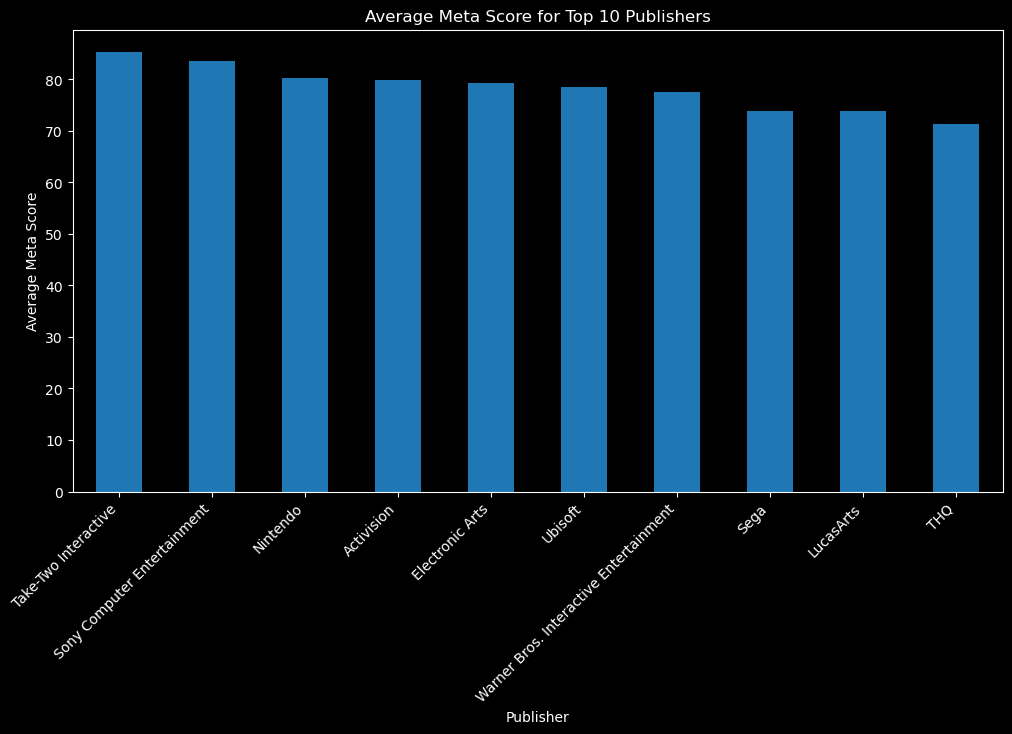

In [14]:
top_publishers = vg['Publisher'].value_counts().head(10).index
vg_top_publishers = vg[vg['Publisher'].isin(top_publishers)]

average_meta_score = vg_top_publishers.groupby('Publisher')['meta_score'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
average_meta_score.plot(kind='bar', color='#1f77b4')
plt.title('Average Meta Score for Top 10 Publishers')
plt.xlabel('Publisher')
plt.ylabel('Average Meta Score')
plt.xticks(rotation=45, ha='right')
plt.show()

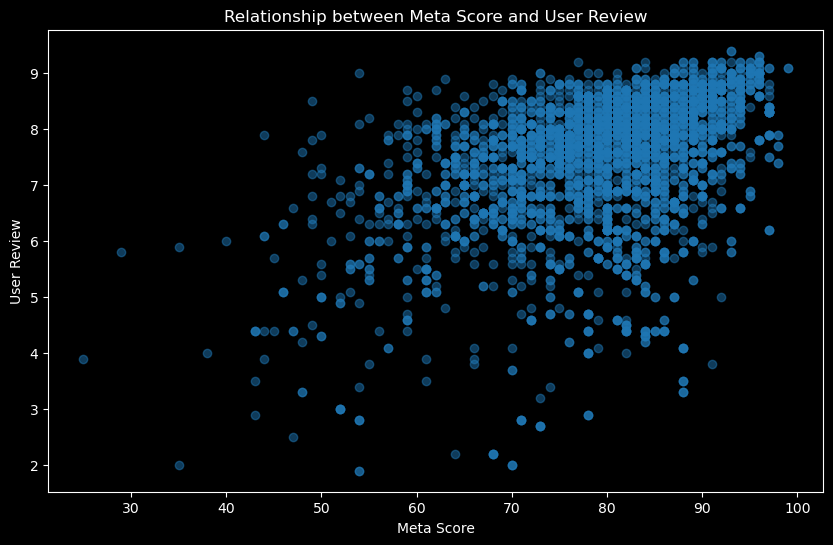

In [15]:
vg_filtered = vg.dropna(subset=['user_review'])

plt.figure(figsize=(10, 6))
plt.scatter(vg_filtered['meta_score'], vg_filtered['user_review'], alpha=0.5, color='#1f77b4')
plt.title('Relationship between Meta Score and User Review')
plt.xlabel('Meta Score')
plt.ylabel('User Review')
plt.savefig('Relationship between Meta Score and User Review.png', bbox_inches='tight', pad_inches=1.5, facecolor='black')
plt.show()

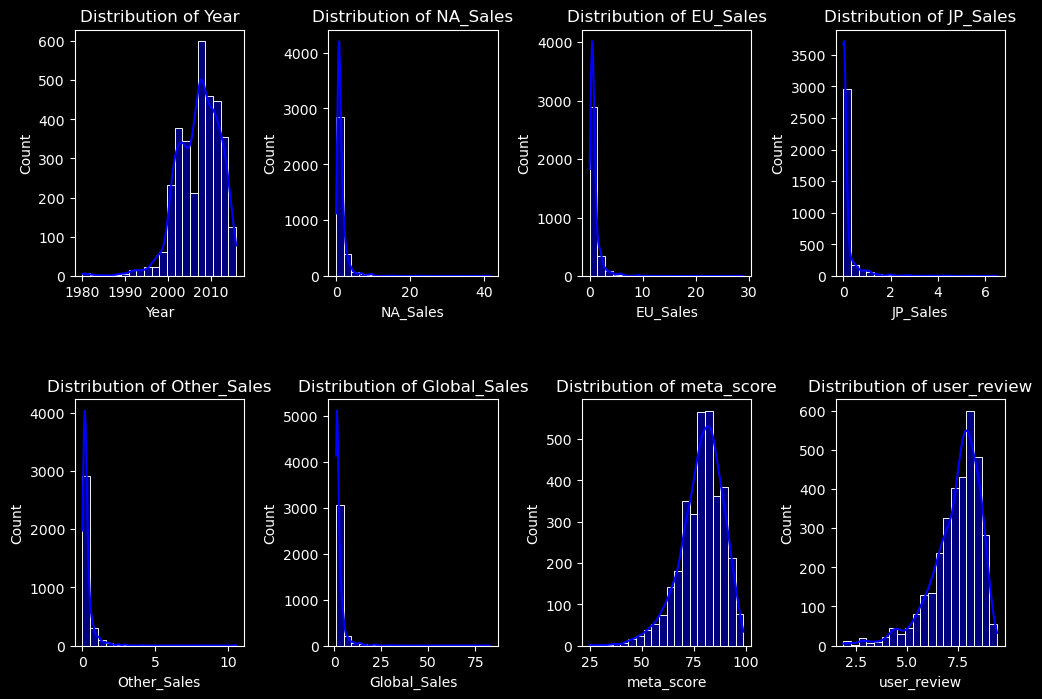

In [16]:
total_rows, total_columns = vg.shape

numeric_columns = vg.select_dtypes(include=['float64', 'int64']).columns
numeric_data = vg[numeric_columns]

fig, axes = plt.subplots(2, 4, figsize=(12, 8), facecolor='black')

for i, (column, ax) in enumerate(zip(numeric_data.columns, axes.flatten()), 1):
    sns.histplot(numeric_data[column], bins=20, kde=True, ax=ax, color='blue')
    ax.set_title(f'Distribution of {column}', color='white')
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')

plt.subplots_adjust(wspace=0.5, hspace=0.5)  

plt.show()

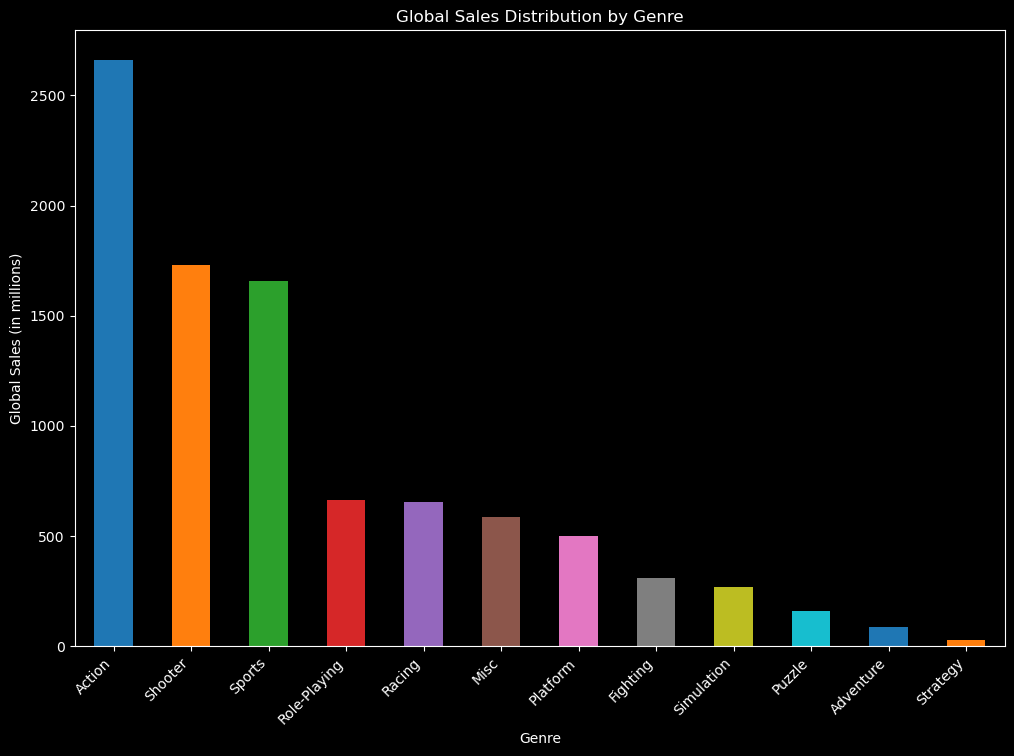

In [17]:
sales_by_genre = vg.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False).head(12)

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

plt.style.use('dark_background')

plt.figure(figsize=(12, 8))
sales_by_genre.plot(kind='bar', color=colors)
plt.title('Global Sales Distribution by Genre', color='white')
plt.xlabel('Genre', color='white')
plt.ylabel('Global Sales (in millions)', color='white')
plt.xticks(rotation=45, ha='right', color='white')
plt.yticks(color='white')
plt.legend().set_visible(False)  # Hide legend for simplicity

plt.savefig('GlobalSalesDistribution.png', bbox_inches='tight', pad_inches=1.5, facecolor='black')

plt.show()

In [42]:
sales_by_genre

Genre
Action          2662.07
Shooter         1732.09
Sports          1656.60
Role-Playing     664.52
Racing           655.19
Misc             588.57
Platform         499.13
Fighting         308.53
Simulation       267.63
Puzzle           159.37
Adventure         89.58
Strategy          30.44
Name: Global_Sales, dtype: float64

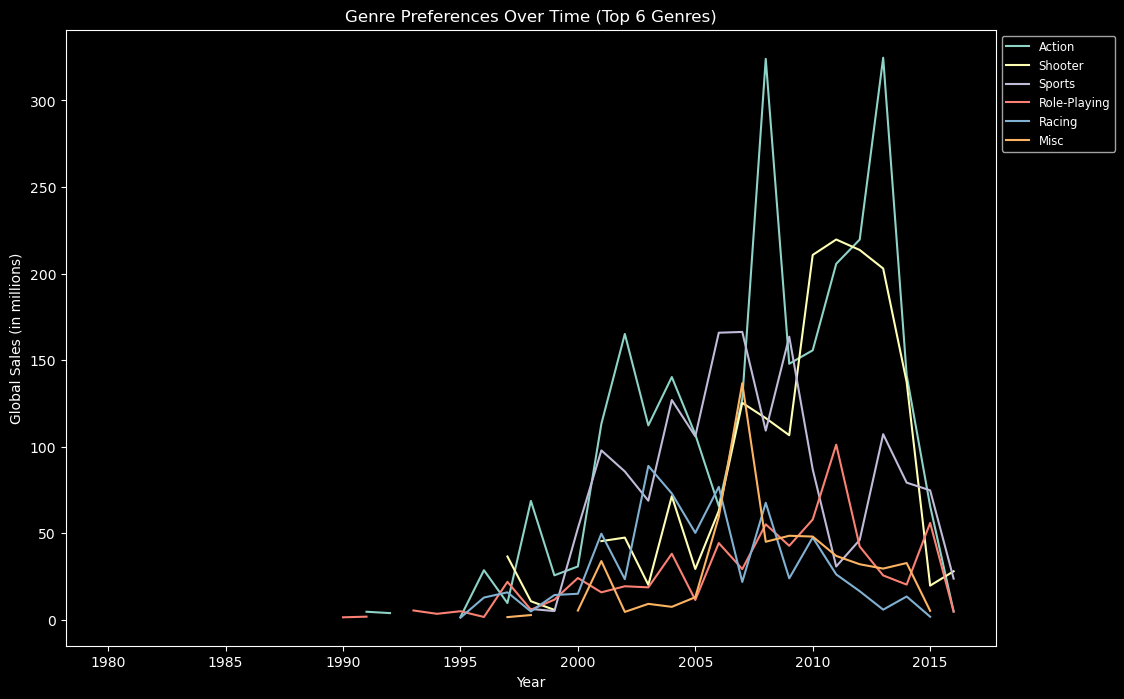

In [18]:
genre_preferences_over_time = vg.groupby(['Year', 'Genre'])['Global_Sales'].sum().unstack()

top_genres = genre_preferences_over_time.sum().sort_values(ascending=False).head(6).index
genre_preferences_top6 = genre_preferences_over_time[top_genres]

plt.style.use('dark_background')

plt.figure(figsize=(12, 8))
for genre in genre_preferences_top6.columns:
    plt.plot(genre_preferences_top6.index, genre_preferences_top6[genre], label=genre)

plt.title('Genre Preferences Over Time (Top 6 Genres)', color='white')
plt.xlabel('Year', color='white')
plt.ylabel('Global Sales (in millions)', color='white')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize='small') 

plt.show()

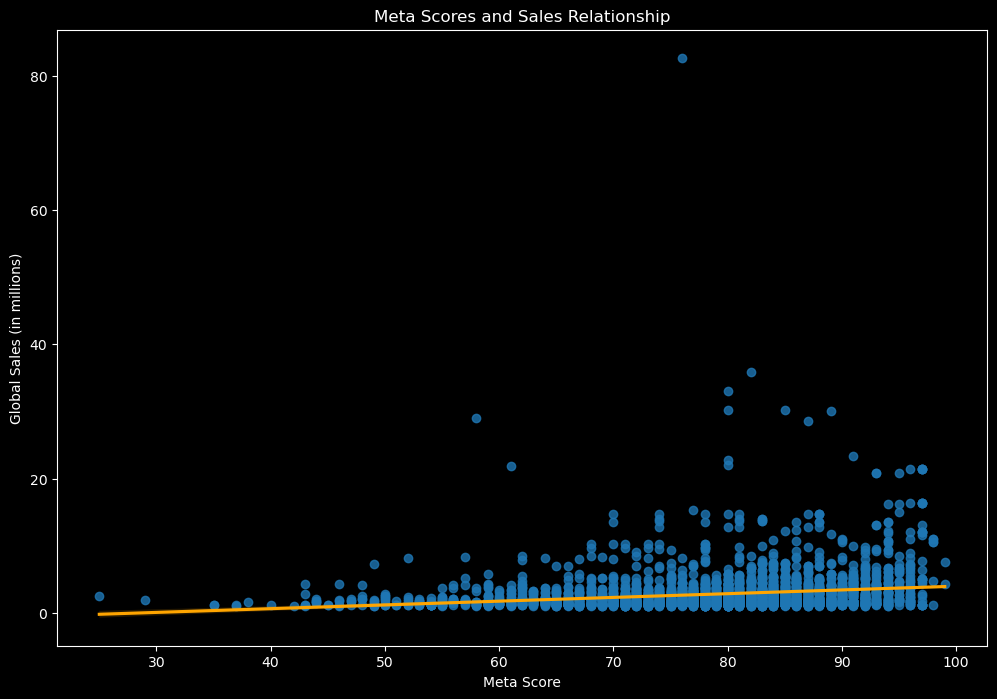

In [19]:
plt.style.use('dark_background')

plt.figure(figsize=(12, 8))
sns.regplot(x='meta_score', y='Global_Sales', data=vg, scatter_kws={'color': '#1f77b4'}, line_kws={'color': 'orange'})  # Adjust colors if needed
plt.title('Meta Scores and Sales Relationship', color='white')
plt.xlabel('Meta Score', color='white')
plt.ylabel('Global Sales (in millions)', color='white')
plt.xticks(color='white')
plt.yticks(color='white')

plt.show()

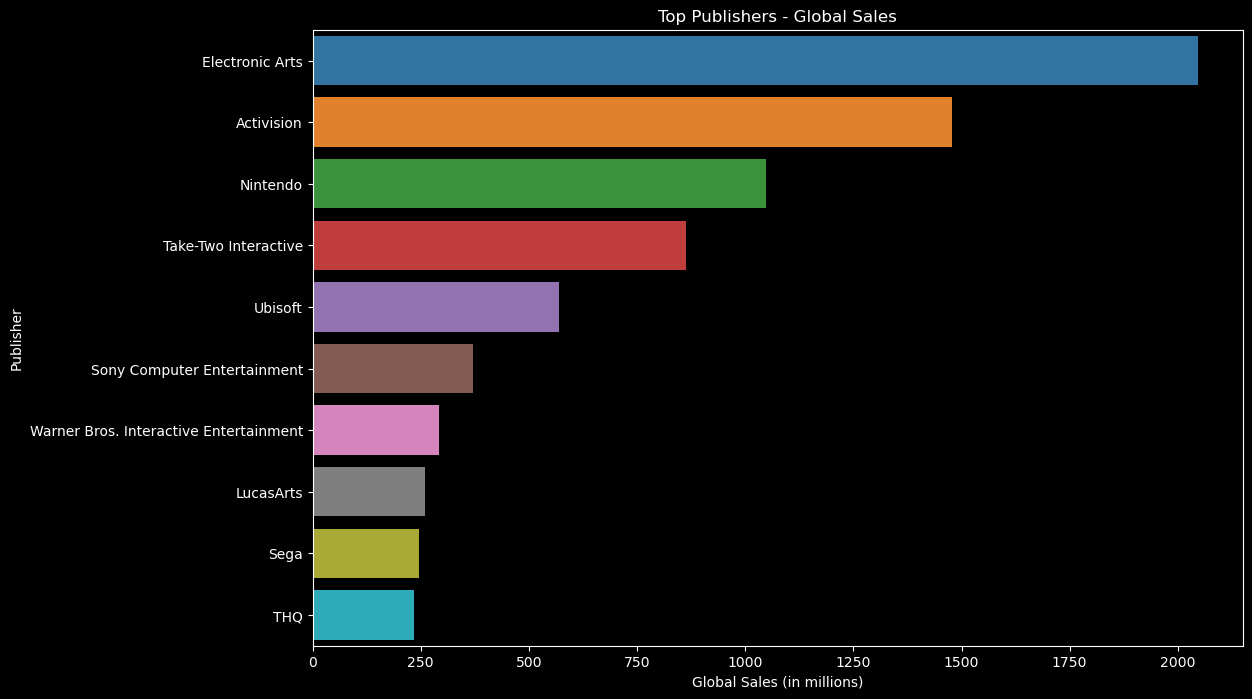

In [20]:
plt.style.use('dark_background')

# Top Publishers
top_publishers = vg['Publisher'].value_counts().head(10).index

# Filtering data for the top 10 publishers
top_publishers_data = vg[vg['Publisher'].isin(top_publishers)]

# Grouping data by Publisher and summing global sales
publisher_sales = top_publishers_data.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False)

# Bar Chart for Top Publishers and Global Sales
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
plt.figure(figsize=(12, 8))
sns.barplot(x=publisher_sales.values, y=publisher_sales.index, palette=colors)
plt.title('Top Publishers - Global Sales', color='white')
plt.xlabel('Global Sales (in millions)', color='white')
plt.ylabel('Publisher', color='white')
plt.xticks(color='white')
plt.yticks(color='white')

plt.show()

<Figure size 1200x800 with 0 Axes>

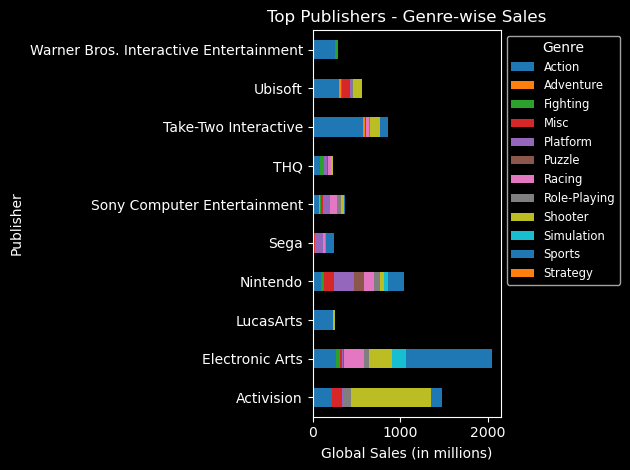

In [21]:
top_publishers = vg['Publisher'].value_counts().head(10).index

top_publishers_data = vg[vg['Publisher'].isin(top_publishers)]

publisher_genre_sales = top_publishers_data.groupby(['Publisher', 'Genre'])['Global_Sales'].sum().unstack()

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
plt.figure(figsize=(12, 8))
publisher_genre_sales.plot(kind='barh', stacked=True, color=colors)
plt.title('Top Publishers - Genre-wise Sales', color='white')
plt.xlabel('Global Sales (in millions)', color='white')
plt.ylabel('Publisher', color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.legend(title='Genre', bbox_to_anchor=(1, 1), loc='upper left', fontsize='small')  
plt.tight_layout()

plt.show()

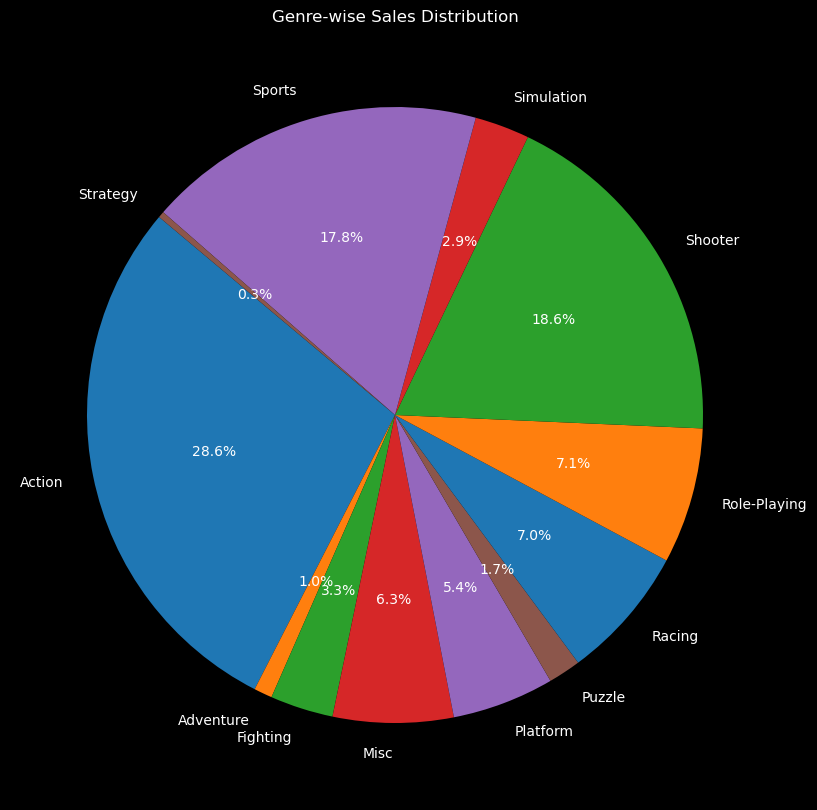

In [22]:
plt.style.use('dark_background')

genre_sales = vg.groupby('Genre')['Global_Sales'].sum()

top_genres = genre_sales

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
plt.figure(figsize=(10, 10))
plt.pie(top_genres, labels=top_genres.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Genre-wise Sales Distribution', color='white')

plt.show()

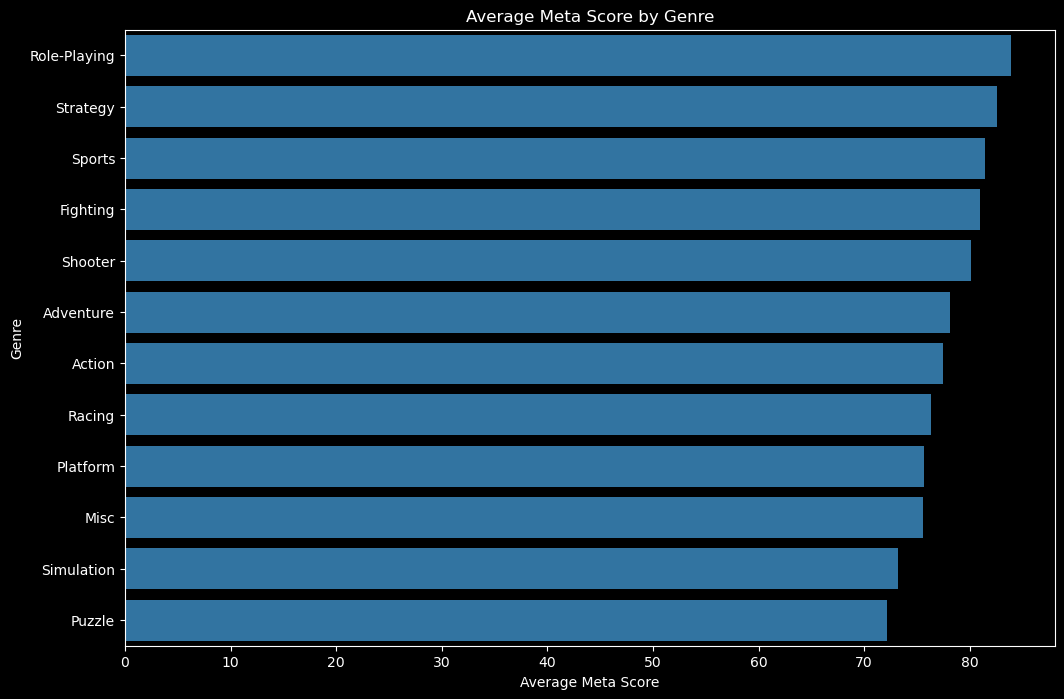

In [23]:
average_meta_score_per_genre = vg.groupby('Genre')['meta_score'].mean().sort_values(ascending=False)

colors = ['#1f77b4']
plt.figure(figsize=(12, 8))
sns.barplot(x=average_meta_score_per_genre.values, y=average_meta_score_per_genre.index, palette=colors)
plt.title('Average Meta Score by Genre', color='white')
plt.xlabel('Average Meta Score', color='white')
plt.ylabel('Genre', color='white')
plt.xticks(color='white')
plt.yticks(color='white')

plt.show()

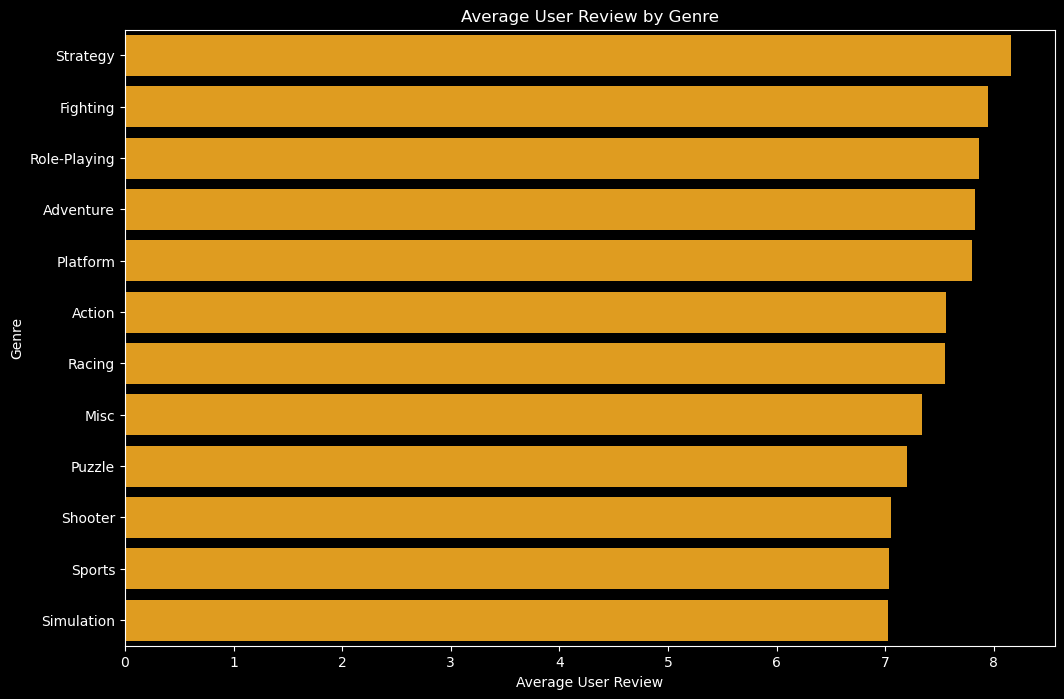

In [27]:
average_user_review_per_genre = vg.groupby('Genre')['user_review'].mean().sort_values(ascending=False)

colors = ['#FFA500']
plt.figure(figsize=(12, 8))
sns.barplot(x=average_user_review_per_genre.values, y=average_user_review_per_genre.index, palette=colors)
plt.title('Average User Review by Genre', color='white')
plt.xlabel('Average User Review', color='white')
plt.ylabel('Genre', color='white')
plt.xticks(color='white')
plt.yticks(color='white')

plt.show()

In [28]:
publisher_sales = vg.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10)

publisher_sales

Publisher
Electronic Arts                           2047.49
Activision                                1476.84
Nintendo                                  1048.15
Take-Two Interactive                       863.35
Ubisoft                                    568.41
Sony Computer Entertainment                371.78
Warner Bros. Interactive Entertainment     291.06
LucasArts                                  259.41
Microsoft Game Studios                     252.99
Sega                                       245.07
Name: Global_Sales, dtype: float64

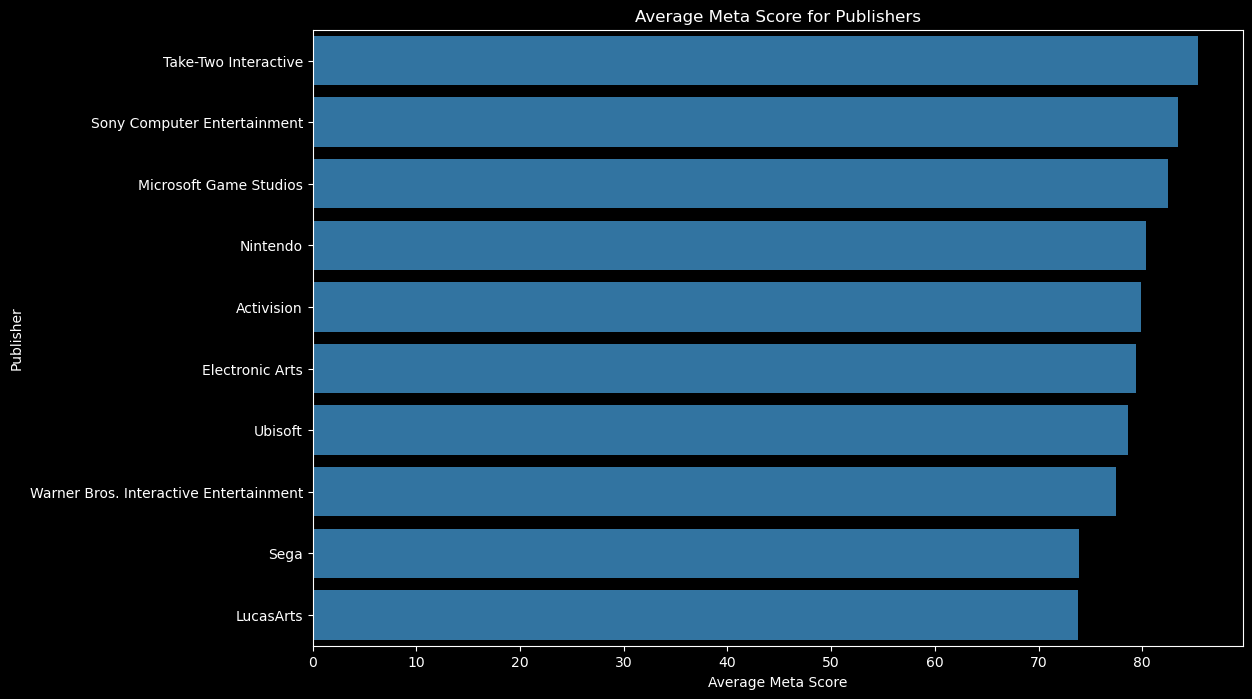

In [29]:
selected_publishers = [
    'Electronic Arts', 'Activision', 'Nintendo', 'Take-Two Interactive',
    'Ubisoft', 'Sony Computer Entertainment', 'Warner Bros. Interactive Entertainment',
    'LucasArts', 'Microsoft Game Studios', 'Sega'
]

selected_publishers_data = vg[vg['Publisher'].isin(selected_publishers)]

average_meta_score_selected_publishers = selected_publishers_data.groupby('Publisher')['meta_score'].mean().sort_values(ascending=False)

colors = ['#1f77b4']
plt.figure(figsize=(12, 8))
sns.barplot(x=average_meta_score_selected_publishers.values, y=average_meta_score_selected_publishers.index, palette=colors)
plt.title('Average Meta Score for Publishers', color='white')
plt.xlabel('Average Meta Score', color='white')
plt.ylabel('Publisher', color='white')
plt.xticks(color='white')
plt.yticks(color='white')

plt.show()

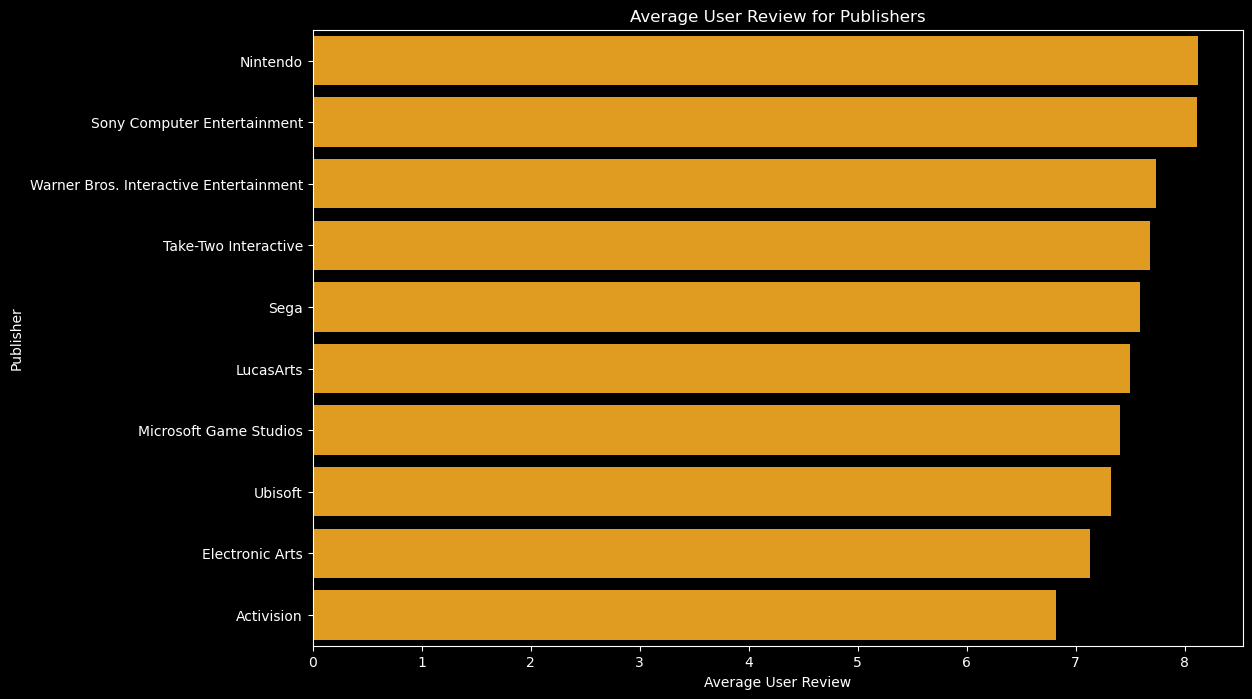

In [30]:
selected_publishers = [
    'Electronic Arts', 'Activision', 'Nintendo', 'Take-Two Interactive',
    'Ubisoft', 'Sony Computer Entertainment', 'Warner Bros. Interactive Entertainment',
    'LucasArts', 'Microsoft Game Studios', 'Sega'
]

selected_publishers_data = vg[vg['Publisher'].isin(selected_publishers)]

average_user_review_per_publisher = selected_publishers_data.groupby('Publisher')['user_review'].mean().sort_values(ascending=False)

colors = ['#FFA500']  
plt.figure(figsize=(12, 8))
sns.barplot(x=average_user_review_per_publisher.values, y=average_user_review_per_publisher.index, palette=colors)
plt.title('Average User Review for Publishers', color='white')
plt.xlabel('Average User Review', color='white')
plt.ylabel('Publisher', color='white')
plt.xticks(color='white')
plt.yticks(color='white')

plt.savefig('Average User Review for Publishers.png', bbox_inches='tight', facecolor='black')
plt.show()

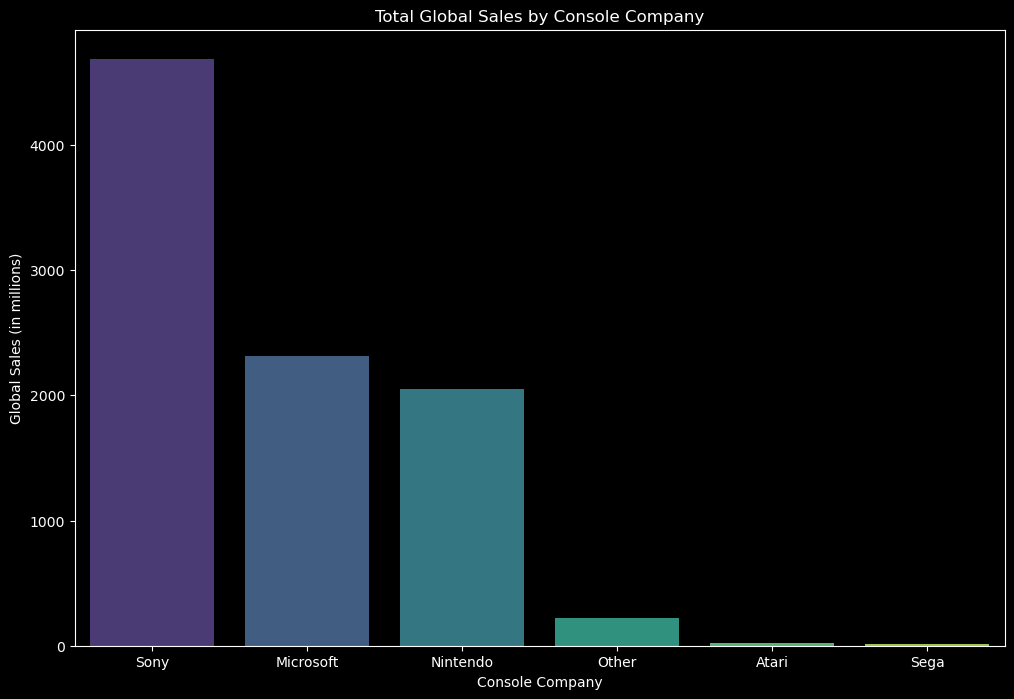

In [32]:
console_sales = vg.groupby('Console_Company')['Global_Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=console_sales.index, y=console_sales.values, palette='viridis')
plt.title('Total Global Sales by Console Company')
plt.xlabel('Console Company')
plt.ylabel('Global Sales (in millions)')

plt.show()

In [35]:
#trying somehting new

from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.io import export_png, output_notebook

# Create a ColumnDataSource from the DataFrame
source = ColumnDataSource(vg)

# Output the plot to the Jupyter notebook
output_notebook()

# Create the scatter plot
p = figure(title='Meta Scores and User Review Relationship', plot_width=800, plot_height=500, background_fill_color='#2F2F2F', toolbar_location=None)
p.scatter(x='meta_score', y='user_review', source=source, size=10, color='#1f77b4', alpha=0.6)

# Customize plot attributes
p.title.text_color = 'black'
p.xaxis.axis_label = 'Meta Score'
p.yaxis.axis_label = 'User Review'
p.xaxis.axis_label_text_color = 'black'
p.yaxis.axis_label_text_color = 'black'
p.xaxis.major_label_text_color = 'black'
p.yaxis.major_label_text_color = 'black'
p.grid.grid_line_color = None

# Add hover tool for additional information
hover = HoverTool()
hover.tooltips = [('Title', '@Name'), ('Meta Score', '@meta_score'), ('User Review', '@user_review')]
p.add_tools(hover)

# Show the plot in the Jupyter notebook
show(p)



Loading BokehJS ...

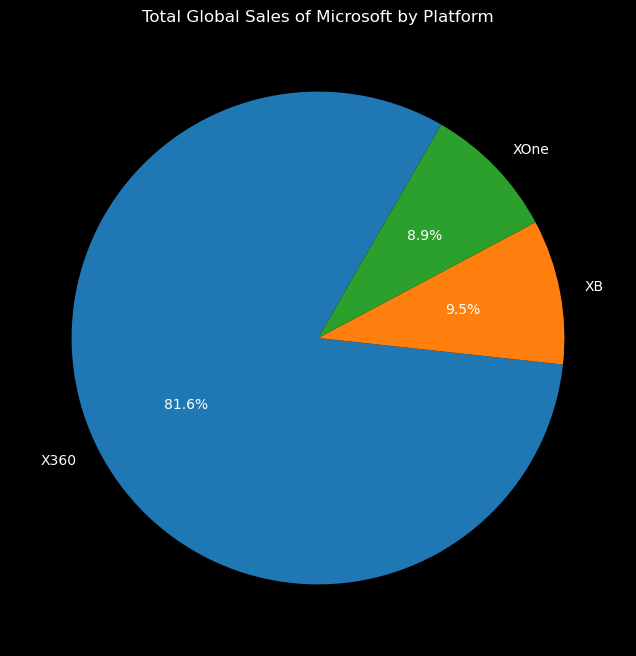

In [36]:
Microsoft_data = vg[vg['Console_Company'] == 'Microsoft']

platform_sales = Microsoft_data.groupby('Platform')['Global_Sales'].sum()

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

plt.figure(figsize=(8, 8))
plt.pie(platform_sales, labels=platform_sales.index, autopct='%1.1f%%', startangle=60, colors= colors)
plt.title('Total Global Sales of Microsoft by Platform')
plt.gca().set_facecolor('#2b2b2b')  

plt.show()

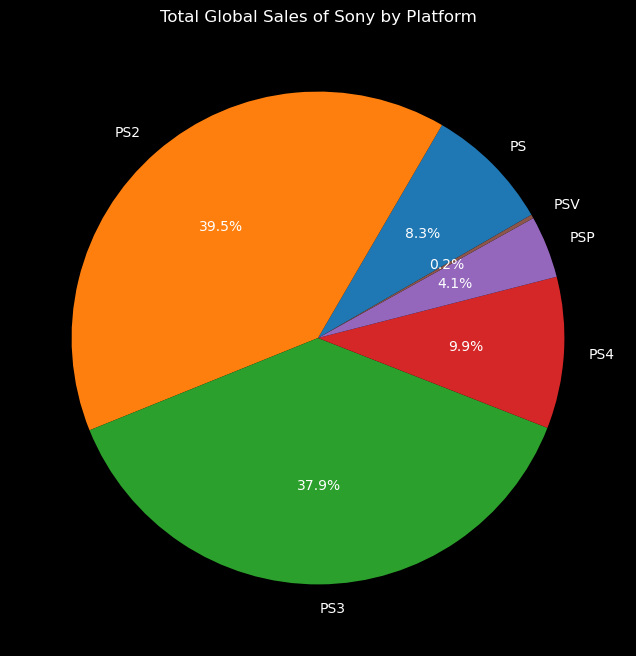

In [37]:
sony_data = vg[vg['Console_Company'] == 'Sony']

platform_sales = sony_data.groupby('Platform')['Global_Sales'].sum()

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

plt.figure(figsize=(8, 8))
plt.pie(platform_sales, labels=platform_sales.index, autopct='%1.1f%%', startangle=30, colors= colors)
plt.title('Total Global Sales of Sony by Platform')
plt.gca().set_facecolor('#2b2b2b')  

plt.show()

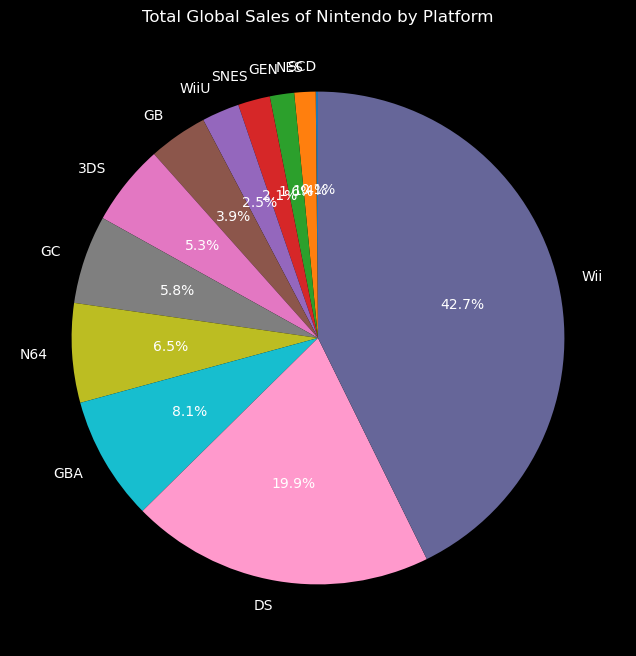

In [38]:
Nintendo_data = vg[vg['Console_Company'] == 'Nintendo']

platform_sales = Nintendo_data.groupby('Platform')['Global_Sales'].sum().sort_values()

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#ff99cc', '#666699']

plt.figure(figsize=(8, 8))
plt.pie(platform_sales, labels=platform_sales.index, autopct='%1.1f%%', startangle=90, colors= colors)
plt.title('Total Global Sales of Nintendo by Platform')
plt.gca().set_facecolor('#2b2b2b')  # Set dark background color

plt.show()

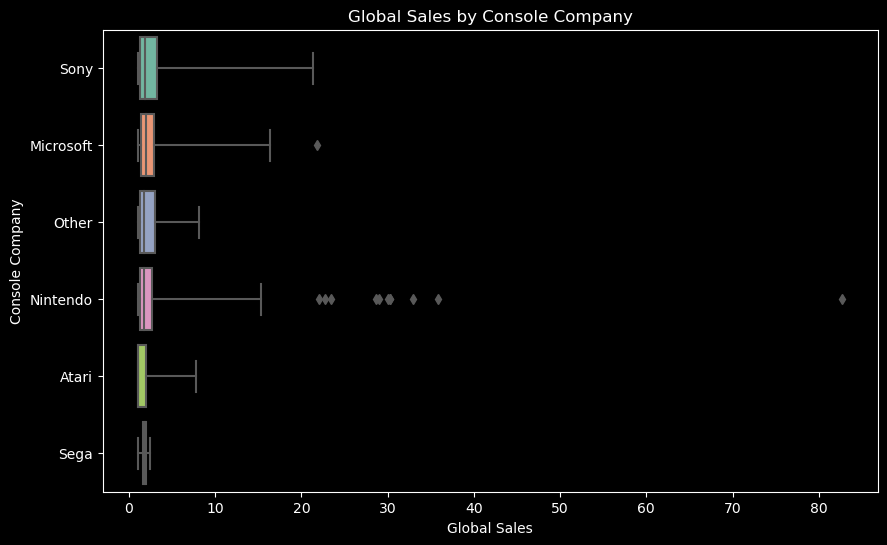

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Global_Sales', y='Console_Company', data=vg, palette='Set2', whis=10)
plt.title('Global Sales by Console Company')
plt.xlabel('Global Sales')
plt.ylabel('Console Company')
plt.show()

In [40]:
sorted_vg = vg.sort_values(by='Global_Sales', ascending=False)

top_games_by_company_platform = sorted_vg.groupby(['Console_Company', 'Platform']).head(1)

selected_columns = ['Name', 'Platform', 'Genre', 'Global_Sales', 'Console_Company']

top_games_by_company_platform[selected_columns]

Name Platform         Genre  \
83                                Wii Sports      Wii        Sports   
86                                    Tetris       GB        Puzzle   
90                     New Super Mario Bros.       DS      Platform   
96                        Kinect Adventures!     X360          Misc   
39                        Grand Theft Auto V      PS3        Action   
97             Grand Theft Auto: San Andreas      PS2        Action   
161                             Mario Kart 7      3DS        Racing   
49                        Grand Theft Auto V      PS4        Action   
163                           Super Mario 64      N64      Platform   
173                             Gran Turismo       PS        Racing   
224                      Donkey Kong Country     SNES      Platform   
264                                   Halo 2       XB       Shooter   
280                               The Sims 3       PC    Simulation   
307                                  Pac-Man     2600        Puzzle   
309   Grand Theft Auto: Liberty City Stories      PSP        Action   
359                  Super Smash Bros. Melee       GC      Fighting   
360                             Mario Kart 8     WiiU        Racing   
437                  Pokemon Emerald Version      GBA  Role-Playing   
449                     Sonic the Hedgehog 2      GEN      Platform   
88                                    Tetris      NES        Puzzle   
4             Call of Duty: Advanced Warfare     XOne       Shooter   
686                          Sonic Adventure       DC      Platform   
236                                Minecraft      PSV          Misc   
2663                                Sonic CD      SCD      Platform   
3169                 Sega Rally Championship      SAT        Racing   

      Global_Sales Console_Company  
83           82.74        Nintendo  
86           30.26        Nintendo  
90           30.01        Nintendo  
96           21.82       Microsoft  
39           21.40            Sony  
97           20.81            Sony  
161          12.21        Nintendo  
49           11.98            Sony  
163          11.89        Nintendo  
173          10.95            Sony  
224           9.30        Nintendo  
264           8.49       Microsoft  
280           8.11           Other  
307           7.81           Atari  
309           7.72            Sony  
359           7.07        Nintendo  
360           6.96        Nintendo  
437           6.41        Nintendo  
449           6.03        Nintendo  
88            5.58        Nintendo  
4             5.13       Microsoft  
686           2.42            Sega  
236           2.25            Sony  
2663          1.50        Nintendo  
3169          1.16            Sega

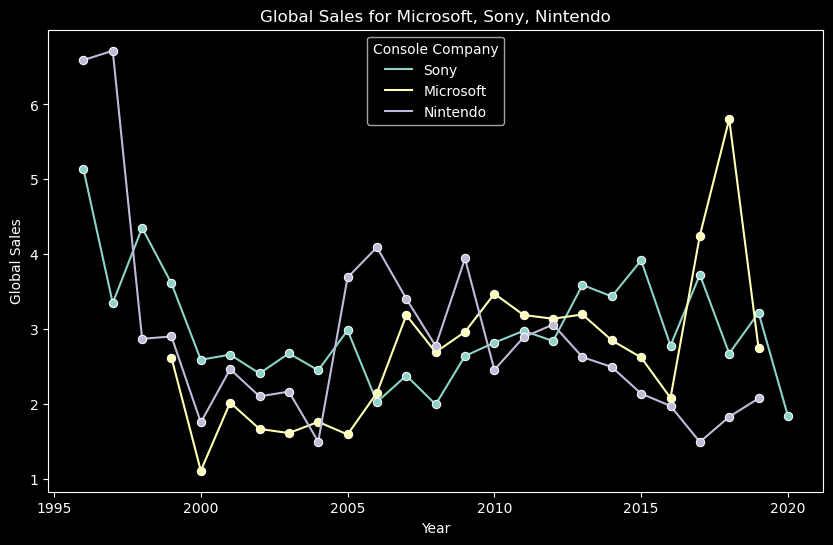

In [41]:
vg['year'] = vg['release_date'].dt.year

selected_companies = ['Microsoft', 'Sony', 'Nintendo']
filtered_data = vg[vg['Console_Company'].isin(selected_companies)]

plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='Global_Sales', hue='Console_Company', data=filtered_data, marker='o', ci=None)
plt.title('Global Sales for Microsoft, Sony, Nintendo')
plt.xlabel('Year')
plt.ylabel('Global Sales')
plt.legend(title='Console Company')
plt.show()

In [4]:
filepath= '/Users/dimi/Downloads/Mock Interview Python Exercise/adult_census_data.csv'
dataframe = pd.read_csv(filepath)

In [5]:
ac = dataframe[[' State-gov', ' Bachelors', ' Never-married', ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' United-States', ' <=50K']]


ac

State-gov    Bachelors        Never-married  \
0       Self-emp-not-inc    Bachelors   Married-civ-spouse   
1                Private      HS-grad             Divorced   
2                Private         11th   Married-civ-spouse   
3                Private    Bachelors   Married-civ-spouse   
4                Private      Masters   Married-civ-spouse   
...                  ...          ...                  ...   
32555            Private   Assoc-acdm   Married-civ-spouse   
32556            Private      HS-grad   Married-civ-spouse   
32557            Private      HS-grad              Widowed   
32558            Private      HS-grad        Never-married   
32559       Self-emp-inc      HS-grad   Married-civ-spouse   

             Adm-clerical   Not-in-family   White     Male   United-States  \
0         Exec-managerial         Husband   White     Male   United-States   
1       Handlers-cleaners   Not-in-family   White     Male   United-States   
2       Handlers-cleaners         Husband   Black     Male   United-States   
3          Prof-specialty            Wife   Black   Female            Cuba   
4         Exec-managerial            Wife   White   Female   United-States   
...                   ...             ...     ...      ...             ...   
32555        Tech-support            Wife   White   Female   United-States   
32556   Machine-op-inspct         Husband   White     Male   United-States   
32557        Adm-clerical       Unmarried   White   Female   United-States   
32558        Adm-clerical       Own-child   White     Male   United-States   
32559     Exec-managerial            Wife   White   Female   United-States   

        <=50K  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32555   <=50K  
32556    >50K  
32557   <=50K  
32558   <=50K  
32559    >50K  

[32560 rows x 9 columns]

In [6]:
ac = ac.rename(columns={
    ' State-gov': 'Employment Type',
    ' Bachelors': 'Degree Status',
    ' Never-married': 'Marriage-Status',
    ' Adm-clerical': 'Job-Role',
    ' Not-in-family': 'Family-Role',
    ' White': 'Ethnicity',
    ' Male': 'Gender',
    ' United-States': 'Country',
    ' <=50K': 'Earnings'
})

ac

Employment Type Degree Status      Marriage-Status  \
0       Self-emp-not-inc     Bachelors   Married-civ-spouse   
1                Private       HS-grad             Divorced   
2                Private          11th   Married-civ-spouse   
3                Private     Bachelors   Married-civ-spouse   
4                Private       Masters   Married-civ-spouse   
...                  ...           ...                  ...   
32555            Private    Assoc-acdm   Married-civ-spouse   
32556            Private       HS-grad   Married-civ-spouse   
32557            Private       HS-grad              Widowed   
32558            Private       HS-grad        Never-married   
32559       Self-emp-inc       HS-grad   Married-civ-spouse   

                 Job-Role     Family-Role Ethnicity   Gender         Country  \
0         Exec-managerial         Husband     White     Male   United-States   
1       Handlers-cleaners   Not-in-family     White     Male   United-States   
2       Handlers-cleaners         Husband     Black     Male   United-States   
3          Prof-specialty            Wife     Black   Female            Cuba   
4         Exec-managerial            Wife     White   Female   United-States   
...                   ...             ...       ...      ...             ...   
32555        Tech-support            Wife     White   Female   United-States   
32556   Machine-op-inspct         Husband     White     Male   United-States   
32557        Adm-clerical       Unmarried     White   Female   United-States   
32558        Adm-clerical       Own-child     White     Male   United-States   
32559     Exec-managerial            Wife     White   Female   United-States   

      Earnings  
0        <=50K  
1        <=50K  
2        <=50K  
3        <=50K  
4        <=50K  
...        ...  
32555    <=50K  
32556     >50K  
32557    <=50K  
32558    <=50K  
32559     >50K  

[32560 rows x 9 columns]

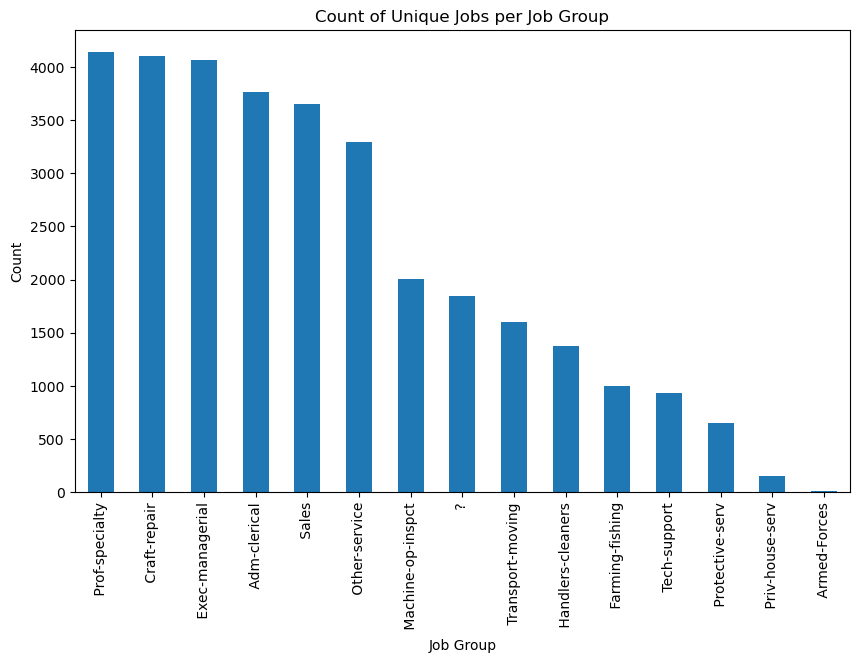

In [9]:
job_counts = ac['Job-Role'].value_counts()

plt.figure(figsize=(10, 6))
job_counts.plot(kind='bar')
plt.title('Count of Unique Jobs per Job Group')
plt.xlabel('Job Group')
plt.ylabel('Count')
plt.show()

In [ ]:
dataframe.columns